#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().sum()

3

Periksa apakah ada missing values

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Periksa outlier dengan boxplot untuk setiap kolom feature

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

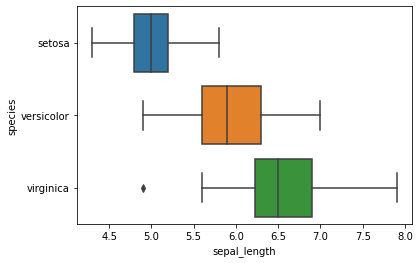

In [5]:
sns.boxplot(x = 'sepal_length', y = 'species', data = df)

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

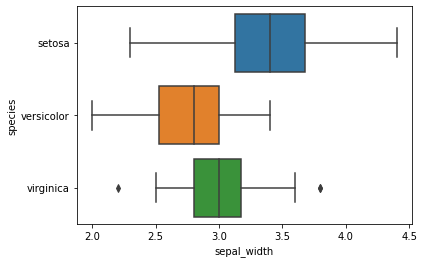

In [6]:
sns.boxplot(x = 'sepal_width', y = 'species', data = df)

<AxesSubplot:xlabel='petal_width', ylabel='species'>

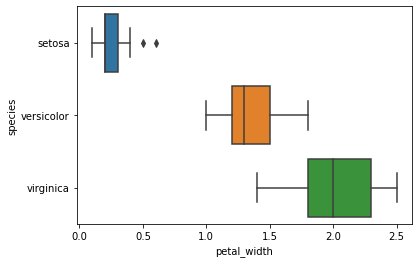

In [7]:
sns.boxplot(x = 'petal_width', y = 'species', data = df)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

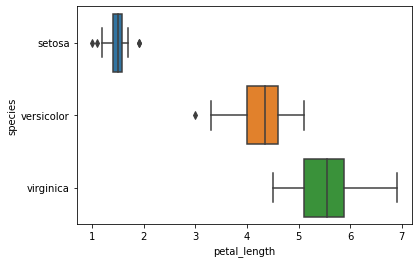

In [8]:
sns.boxplot(x = 'petal_length', y = 'species', data = df)

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [12]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("accuracy score", accuracy_score(y_test,y_pred))

Confusion Matrix
 [[2 0 0]
 [0 6 0]
 [0 3 4]]
accuracy score 0.8


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [15]:
secondclassifier = GaussianNB()
secondclassifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [16]:
y_pred2 = secondclassifier.predict(X_test)
print(y_pred2)

['virginica' 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [17]:
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred2))
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))

Confusion Matrix
 [[2 0 0]
 [0 6 0]
 [0 3 4]]
Accuracy Score:  0.8


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [18]:
thirdclassifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean',p=2)
thirdclassifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [19]:
y_pred3 = thirdclassifier.predict(X_test)
y_pred3

array(['virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

Ukur akurasi dari model K-Nearest Neighbor

In [20]:

print("Confusion Matrix\n", confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

Confusion Matrix
 [[2 0 0]
 [0 6 0]
 [0 2 5]]
0.8666666666666667


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...